<a href="https://colab.research.google.com/github/gustavo-ifusp/edisc-analytics/blob/main/Analise_de_Dados_Indicadores_professores_bolsa_PUB_maio2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analises de Dados (Maio/2021) - parte 2 - E-Disciplinas USP - Bolsa PUB 2020/2021**
Professor Orientador Dr. Ewout Ter Haar

Aluno Gustavo de Andrade

Este estudo é uma continuação ao projeto do Programa Unificado de Bolsa da Universidade de São Paulo de apoio pedagógico na plataforma moodle E-Disciplinas USP. Aprofundaremos as leituras do dataframe da plataforma modelando os dados de forma a normalizá-los, buscando identificar indicadores já conhecidos e buscando novos que façam sentido, introduzindo a Machine Learning como agente facilitador, padronizando e rescalonando para fim de comparação.
Buscarei introduzir na analise o engajamento dos docentes, fazendo comparações entre institutos e ao longo dos anos em sua participação normalizando os dados da seguinte forma:

????

Este estudo, assim como os dados apresentados, são te interesse particular, com fim educacional, sendo proíbido sua reprodução em todas hipóteses, permitido apenas a visualização no próprio canal disponivel.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Este Dataframe apresenta a contagem da quantidade de docentes, disciplinas e turmas, separadas por unidade e por ano oriunda do sistema de matrículas (Jupiterweb) da Universidade de São Paulo.

In [ ]:
url1 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/docdistur.csv"
base = pd.read_csv(url1)
base['sglund'] = base['sglund'].astype('object')
base['ano'] = base['ano'].astype('int64')
base.rename(columns={'sglund':'unidade'}, inplace = True)
base = base[base["ano"] > 2011]
base.sample(2)

,unidade,ano,docentes,disciplinas,turmas
430,FEA,2016,191,230,872
618,FOB,2019,51,14,160


Este dataframe a seguir condiz com os dados do E-disciplina USP completo:

In [ ]:
url2 = "https://raw.githubusercontent.com/gustavo-ifusp/edisc-analytics/main/data/raw/mc-24-11-2020.csv"
dados = pd.read_csv(url2)
dados.iloc[-2:]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,link,assign,attendance,bigbluebuttonbn,book,chat,choice,data,dialogue,folder,forum,glossary,imscp,label,lesson,lti,oublog,ouwiki,page,questionnaire,quiz,recordingsbn,resource,scorm,survey,url,wiki,workshop,sdi,Nunique,N,Nresource1,Nresource2,Ncommunication,Nfeedback,Nassess,Nadmin,fullname,shortname,idnumber,catname,unidade,ano,sem,advancedteacher,editingteacher,manager,monitor,student,studentcopy,teacher,nturmas,area,posgrad,coddis,semestre,activequiz,assignment,hvp,simplecertificate,videogallery,choicegroup,scheduler,vpl,offlinequiz,obs,journal,poster,feedback,checklist,pdfannotator,publication,studentquiz,game,quizgame,subcourse
38292,83959,https://edisciplinas.usp.br/course/view.php?id...,1,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.693147,2,2,0,0,1,0,1,0,teste_marcos,teste_marcos,NaN,FFLCH,FFLCH,2020,2,0,0,0,0,1,0,0,0,humanas,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38293,83965,https://edisciplinas.usp.br/course/view.php?id...,3,1,1,1,1,1,0,1,1,4,1,0.0,7,1,0.0,0,0,2,0,8,0.0,1,0.0,0,6,0,0,2.517794,18,42,15,4,7,1,12,2,STI FMRP 2020,STI FMRP 2020,NaN,STI,FMRP,2020,2,0,1,0,0,0,0,0,0,biologicas,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38294 entries, 0 to 38293
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              38294 non-null  int64  
 1   link               38294 non-null  object 
 2   assign             38294 non-null  int64  
 3   attendance         38294 non-null  int64  
 4   bigbluebuttonbn    38294 non-null  int64  
 5   book               38294 non-null  int64  
 6   chat               38294 non-null  int64  
 7   choice             38294 non-null  int64  
 8   data               38294 non-null  int64  
 9   dialogue           38294 non-null  int64  
 10  folder             38294 non-null  int64  
 11  forum              38294 non-null  int64  
 12  glossary           38294 non-null  int64  
 13  imscp              38294 non-null  float64
 14  label              38294 non-null  int64  
 15  lesson             38294 non-null  int64  
 16  lti                382

Este terceiro Dataframe a seguir informa por curso a quantidade de matriculados:

In [ ]:
url3 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/matrcurso.csv"
matrcurso = pd.read_csv(url3)
matrcurso['sglund'] = matrcurso['sglund'].astype('object')
matrcurso.rename(columns={'sglund':'unidade'}, inplace = True)
matrcurso.sample(5)

,ano,sem,codclg,codcur,codhab,staalu,codund,unidade,nomcur,nomhab,matr
4097,2015,1,8,8051,6702,M,8,FFLCH,Letras,Licenciatura - Habilitação: Francês,1
1994,2020,1,3,3111,Sem cadastro,A,3,EP,Engenharia,NaN,3
19249,2016,2,67,Sem cadastro,Sem cadastro,M,5,FM,NaN,NaN,1
4650,2016,1,8,8051,804,M,8,FFLCH,Letras,Bacharelado - Habilitação: Inglês,33
18672,2018,1,89,89001,Sem cadastro,A,89,FDRP,Direito,NaN,1


# **Indicador 2: Mn /n° de docentes**
O segundo indicador que vou analisar é a somatoria da coluna (Mn) / nº de docentes e visualizar as unidades mais representativas por ano, lembrando que temos 60 entradas em unidade nos três dataframes.

M1 = Nfeedback;<br>
M2 = feedback;<br>
M3 = publication;<br>
M4 = teacher;<br>
M5 = editingteacher;<br>
M6 = forum;<br>
M7 = lesson;<br>
M8 = journal;<br>
M9 = poster;<br>
M10 = Nassess;<br>
M11 = Nadmin;<br>
M12 = checklist;<br>
M13 = advancedteacher;<br>
NM = Número de docentes

In [ ]:
M1 = dados.groupby(['ano','unidade'])['Nfeedback'].sum()
M2 = dados.groupby(['ano','unidade'])['feedback'].sum()
M3 = dados.groupby(['ano','unidade'])['publication'].sum()
M4 = dados.groupby(['ano','unidade'])['teacher'].sum()
M5 = dados.groupby(['ano','unidade'])['editingteacher'].sum()
M6 = dados.groupby(['ano','unidade'])['forum'].sum()
M7 = dados.groupby(['ano','unidade'])['lesson'].sum()
M8 = dados.groupby(['ano','unidade'])['journal'].sum()
M9 = dados.groupby(['ano','unidade'])['poster'].sum()
M10 = dados.groupby(['ano','unidade'])['Nassess'].sum()
M11 = dados.groupby(['ano','unidade'])['Nadmin'].sum()
M12 = dados.groupby(['ano','unidade'])['checklist'].sum()
M13 = dados.groupby(['ano','unidade'])['advancedteacher'].sum()
NM = base.groupby(['ano','unidade'])['docentes'].sum()
i1 = pd.concat([M1,M2, M3, M4, M5, M6, M7, M8, M9, M10, M11, M12, M13, NM],axis = 1)
i1 = i1.fillna(0)
i1.reset_index(level=0, inplace=True)
i1.reset_index(level=0, inplace=True)
i1 = i1.query("docentes != '0'")

In [ ]:
i1['indicador1'] = (i1['Nfeedback']/i1['docentes'])
i1['indicador2'] = (i1['feedback']/i1['docentes'])
i1['indicador3'] = (i1['publication']/i1['docentes'])
i1['indicador4'] = (i1['teacher']/i1['docentes'])
i1['indicador5'] = (i1['editingteacher']/i1['docentes'])
i1['indicador6'] = (i1['forum']/i1['docentes'])
i1['indicador7'] = (i1['lesson']/i1['docentes'])
i1['indicador8'] = (i1['journal']/i1['docentes'])
i1['indicador9'] = (i1['poster']/i1['docentes'])
i1['indicador10'] = (i1['Nassess']/i1['docentes'])
i1['indicador11'] = (i1['Nadmin']/i1['docentes'])
i1['indicador12'] = (i1['checklist']/i1['docentes'])
i1['indicador13'] = (i1['advancedteacher']/i1['docentes'])
i1.head(5)

,unidade,ano,Nfeedback,feedback,publication,teacher,editingteacher,forum,lesson,journal,poster,Nassess,Nadmin,checklist,advancedteacher,docentes,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
0,CEBIMar,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1,CENA,2012,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,27.0,0.000000,0.0,0.0,0.000000,0.074074,0.074074,0.000000,0.0,0.0,0.037037,0.000000,0.0,0.0
2,CEPEUSP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
3,EACH,2012,0.0,0.0,0.0,2.0,20.0,42.0,0.0,0.0,0.0,61.0,0.0,0.0,0.0,257.0,0.000000,0.0,0.0,0.007782,0.077821,0.163424,0.000000,0.0,0.0,0.237354,0.000000,0.0,0.0
4,ECA,2012,6.0,0.0,0.0,1.0,40.0,51.0,1.0,0.0,0.0,87.0,1.0,0.0,0.0,194.0,0.030928,0.0,0.0,0.005155,0.206186,0.262887,0.005155,0.0,0.0,0.448454,0.005155,0.0,0.0


In [ ]:
i1.describe().loc[['mean','std']]

,ano,Nfeedback,feedback,publication,teacher,editingteacher,forum,lesson,journal,poster,Nassess,Nadmin,checklist,advancedteacher,docentes,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
mean,2015.989858,23.626775,0.513185,1.918864,5.858012,126.073022,129.718053,3.916836,0.221095,0.028398,309.002028,10.466531,0.180527,11.472617,98.040568,0.839395,0.015946,0.088475,0.348680,5.266115,4.306447,0.043096,0.014630,0.000198,7.321073,0.209845,0.006608,0.219845
std,2.576058,80.284673,4.143063,10.047322,12.834473,253.650019,255.596766,15.712974,1.537407,0.199605,779.146321,38.611171,1.288578,91.597197,103.308394,9.660158,0.271429,1.148545,2.951794,37.190467,27.303124,0.294484,0.192258,0.001547,54.787709,1.748496,0.087737,1.701779


#**Indicador 1: Nfeedback / Nº de docentes**

In [ ]:
i1_1 = i1.loc[(i1['indicador1']) > 1.5] #esse filtro seleciona apenas as unidades que possuirem uma media >2
i1_1.head(2)

,unidade,ano,Nfeedback,feedback,publication,teacher,editingteacher,forum,lesson,journal,poster,Nassess,Nadmin,checklist,advancedteacher,docentes,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
264,FMRP,2016,571.0,0.0,0.0,50.0,827.0,699.0,35.0,0.0,0.0,743.0,11.0,0.0,490.0,267.0,2.138577,0.0,0.0,0.187266,3.097378,2.617978,0.131086,0.0,0.0,2.782772,0.041199,0.0,1.835206
268,FORP,2016,4.0,0.0,0.0,0.0,13.0,14.0,0.0,0.0,0.0,40.0,4.0,0.0,0.0,1.0,4.000000,0.0,0.0,0.000000,13.000000,14.000000,0.000000,0.0,0.0,40.000000,4.000000,0.0,0.000000


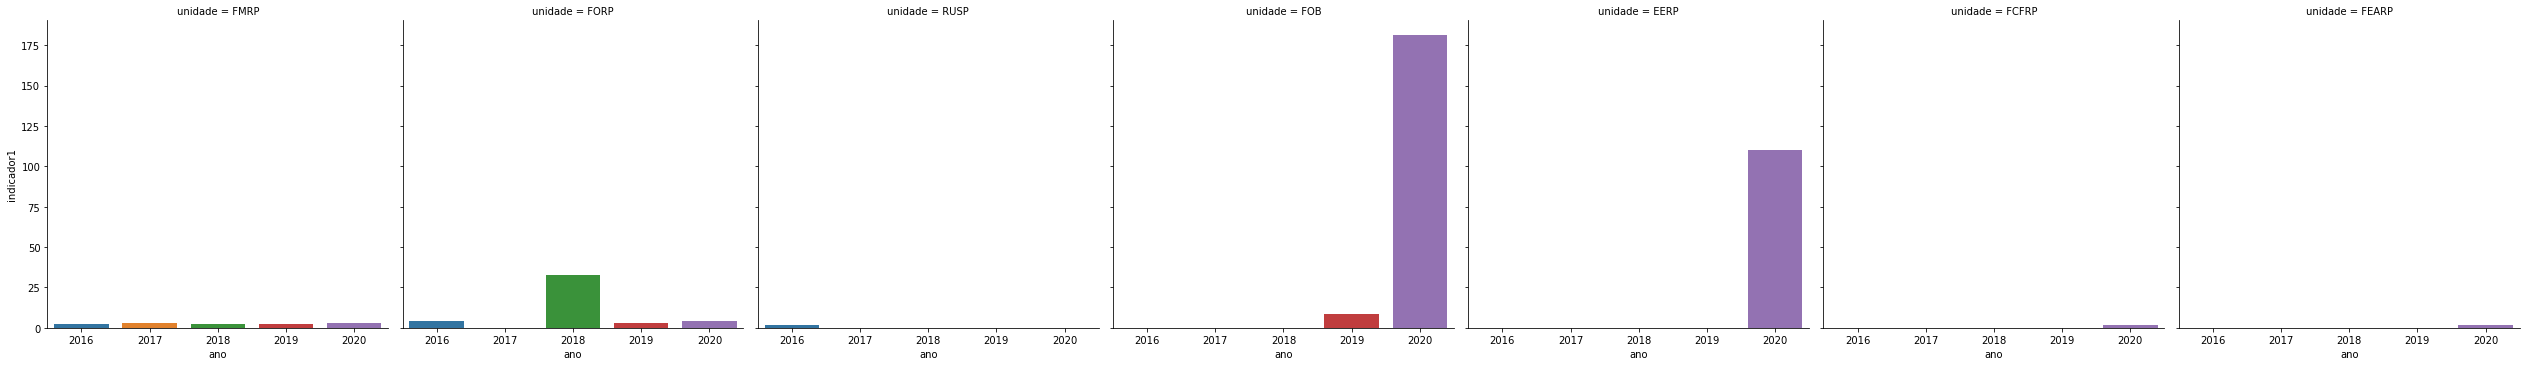

In [ ]:
sns.catplot(x="ano", y="indicador1", col="unidade",
                data=i1_1, 
                kind="bar"
                )

#**Indicador 2: feedback / Nº de docentes**

In [ ]:
i1_2 = i1.loc[(i1['indicador2']) > 0.1] 
i1_2.sample(2)

,unidade,ano,Nfeedback,feedback,publication,teacher,editingteacher,forum,lesson,journal,poster,Nassess,Nadmin,checklist,advancedteacher,docentes,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
536,RUSP,2020,7.0,2.0,0.0,5.0,61.0,235.0,0.0,1.0,0.0,155.0,2.0,0.0,2.0,6.0,1.166667,0.333333,0.000000,0.833333,10.166667,39.166667,0.000000,0.166667,0.0,25.833333,0.333333,0.0,0.333333
432,EESC,2019,61.0,60.0,1.0,10.0,612.0,770.0,2.0,3.0,0.0,1771.0,110.0,0.0,7.0,195.0,0.312821,0.307692,0.005128,0.051282,3.138462,3.948718,0.010256,0.015385,0.0,9.082051,0.564103,0.0,0.035897


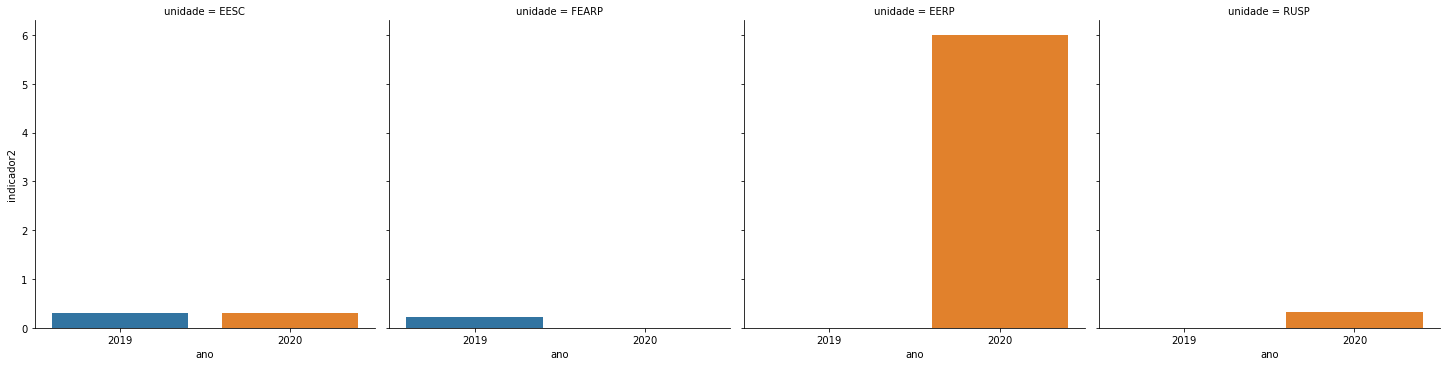

In [ ]:
sns.catplot(x="ano", y="indicador2", col="unidade",
                data=i1_2, 
                kind="bar"
                )

#**Indicador 3: publication / Nº de docentes**

In [ ]:
i1_3 = i1.loc[(i1['indicador3']) > 0.5] 
i1_3.sample(2)

,unidade,ano,Nfeedback,feedback,publication,teacher,editingteacher,forum,lesson,journal,poster,Nassess,Nadmin,checklist,advancedteacher,docentes,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
488,EEL,2020,120.0,0.0,82.0,19.0,355.0,447.0,0.0,1.0,0.0,1459.0,63.0,4.0,2.0,141.0,0.851064,0.0,0.58156,0.134752,2.51773,3.170213,0.0,0.007092,0.0,10.347518,0.446809,0.028369,0.014184
489,EERP,2020,110.0,6.0,17.0,54.0,536.0,466.0,6.0,1.0,0.0,1087.0,36.0,0.0,3.0,1.0,110.000000,6.0,17.00000,54.000000,536.00000,466.000000,6.0,1.000000,0.0,1087.000000,36.000000,0.000000,3.000000


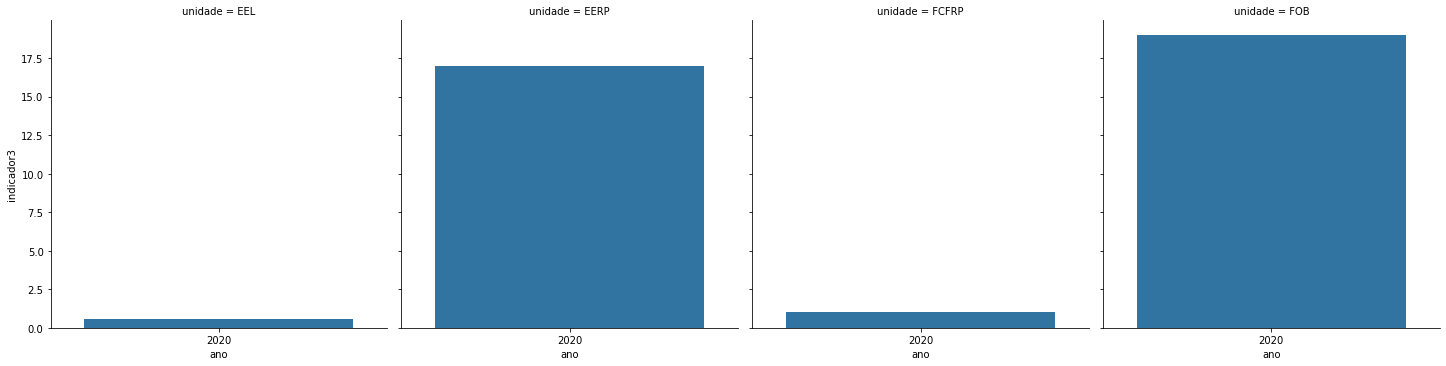

In [ ]:
sns.catplot(x="ano", y="indicador3", col="unidade",
                data=i1_3, 
                kind="bar"
                )

#**Indicador 4: teacher / Nº de docentes**

In [ ]:
i1_4 = i1.loc[(i1['indicador4']) > 1] 
i1_4.sample(2)

,unidade,ano,Nfeedback,feedback,publication,teacher,editingteacher,forum,lesson,journal,poster,Nassess,Nadmin,checklist,advancedteacher,docentes,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
508,FORP,2020,25.0,0.0,2.0,8.0,450.0,346.0,2.0,0.0,0.0,530.0,26.0,0.0,11.0,6.0,4.166667,0.0,0.333333,1.333333,75.0,57.666667,0.333333,0.0,0.0,88.333333,4.333333,0.0,1.833333
182,EE,2015,1.0,0.0,0.0,23.0,84.0,53.0,0.0,0.0,0.0,16.0,0.0,0.0,3.0,3.0,0.333333,0.0,0.000000,7.666667,28.0,17.666667,0.000000,0.0,0.0,5.333333,0.000000,0.0,1.000000


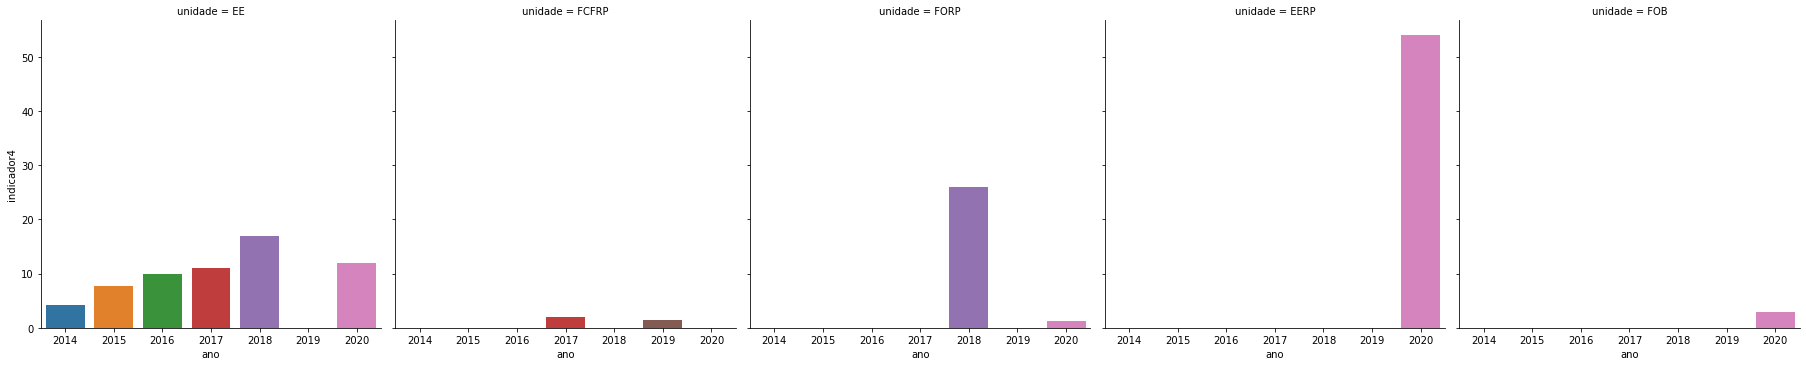

In [ ]:
sns.catplot(x="ano", y="indicador4", col="unidade",
                data=i1_4, 
                kind="bar"
                )

#**Indicador 5: editingteacher / Nº de docentes**

In [ ]:
i1_5 = i1.loc[(i1['indicador5']) > 5 ]
i1_5.sample(2)

,unidade,ano,Nfeedback,feedback,publication,teacher,editingteacher,forum,lesson,journal,poster,Nassess,Nadmin,checklist,advancedteacher,docentes,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
255,FCFRP,2016,0.0,0.0,0.0,1.0,18.0,14.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,1.000000,18.000000,14.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
504,FMRP,2020,754.0,4.0,86.0,83.0,2102.0,2051.0,150.0,1.0,1.0,3571.0,276.0,17.0,579.0,238.0,3.168067,0.016807,0.361345,0.348739,8.831933,8.617647,0.630252,0.004202,0.004202,15.004202,1.159664,0.071429,2.432773


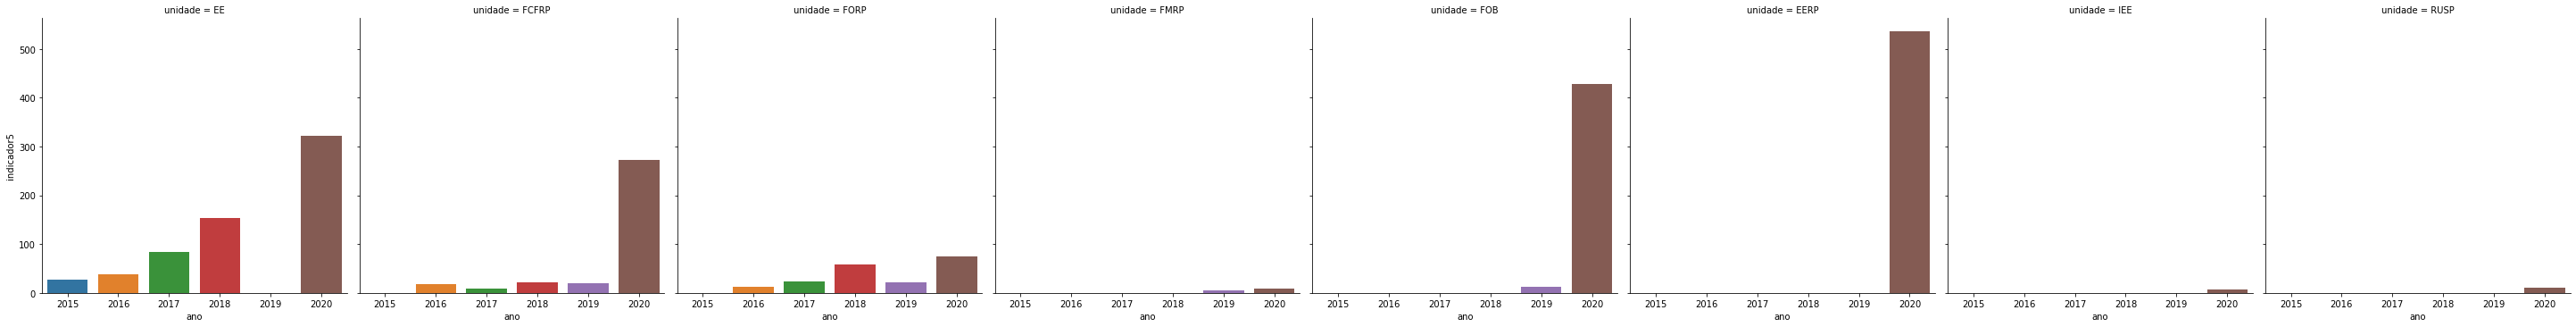

In [ ]:
sns.catplot(x="ano", y="indicador5", col="unidade",
                data=i1_5, 
                kind="bar"
                )

#**Indicador 6: forum / Nº de docentes**

In [ ]:
i1_6 = i1.loc[(i1['indicador6']) > 30] 
i1_6.sample(2)

,unidade,ano,Nfeedback,feedback,publication,teacher,editingteacher,forum,lesson,journal,poster,Nassess,Nadmin,checklist,advancedteacher,docentes,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
489,EERP,2020,110.0,6.0,17.0,54.0,536.0,466.0,6.0,1.0,0.0,1087.0,36.0,0.0,3.0,1.0,110.000000,6.0,17.0,54.0,536.000000,466.000000,6.0,1.0,0.0,1087.000000,36.0,0.000000,3.000000
507,FOB,2020,544.0,0.0,57.0,9.0,1286.0,605.0,0.0,12.0,0.0,848.0,30.0,5.0,22.0,3.0,181.333333,0.0,19.0,3.0,428.666667,201.666667,0.0,4.0,0.0,282.666667,10.0,1.666667,7.333333


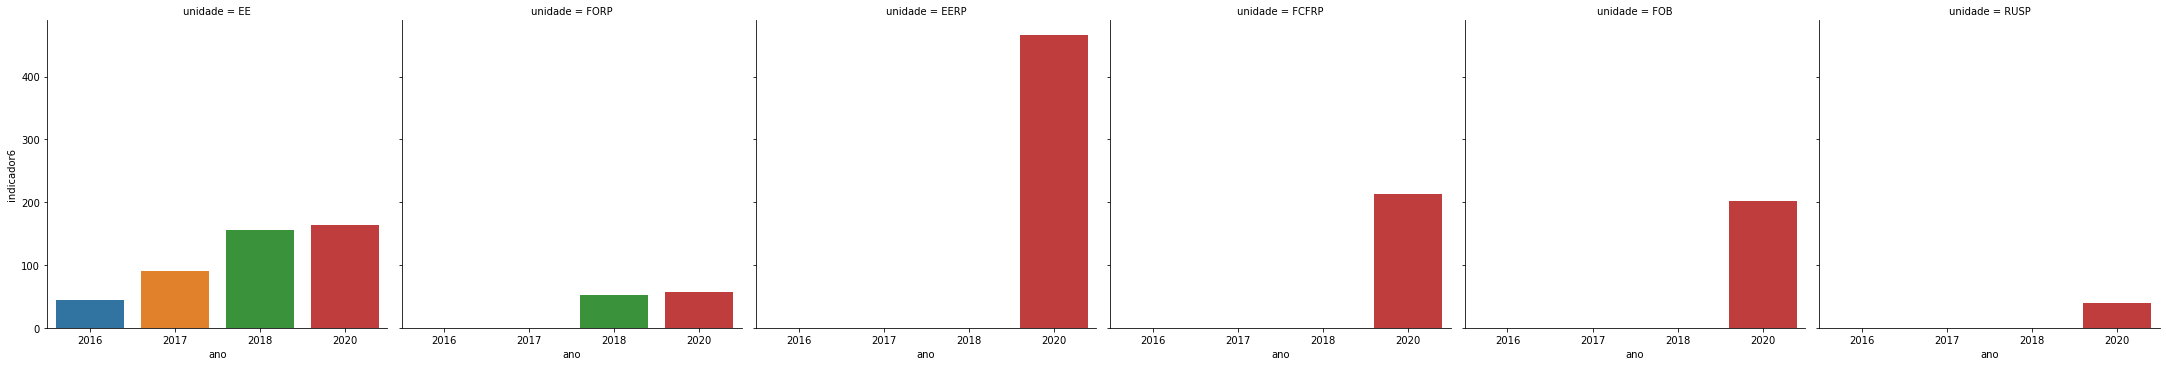

In [ ]:
sns.catplot(x="ano", y="indicador6", col="unidade",
                data=i1_6, 
                kind="bar"
                )

#**Indicador 7: lesson / Nº de docentes**

In [ ]:
i1_7 = i1.loc[(i1['indicador7']) > 0.5] #esse indicador possui uma média de uso muito pequena por aluno, possivelmente não faça sentido!
i1_7.sample(2)

,unidade,ano,Nfeedback,feedback,publication,teacher,editingteacher,forum,lesson,journal,poster,Nassess,Nadmin,checklist,advancedteacher,docentes,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
393,FORP,2018,33.0,0.0,0.0,26.0,58.0,53.0,1.0,0.0,0.0,68.0,1.0,0.0,12.0,1.0,33.0,0.0,0.0,26.0,58.0,53.0,1.0,0.0,0.0,68.0,1.0,0.0,12.0
489,EERP,2020,110.0,6.0,17.0,54.0,536.0,466.0,6.0,1.0,0.0,1087.0,36.0,0.0,3.0,1.0,110.0,6.0,17.0,54.0,536.0,466.0,6.0,1.0,0.0,1087.0,36.0,0.0,3.0


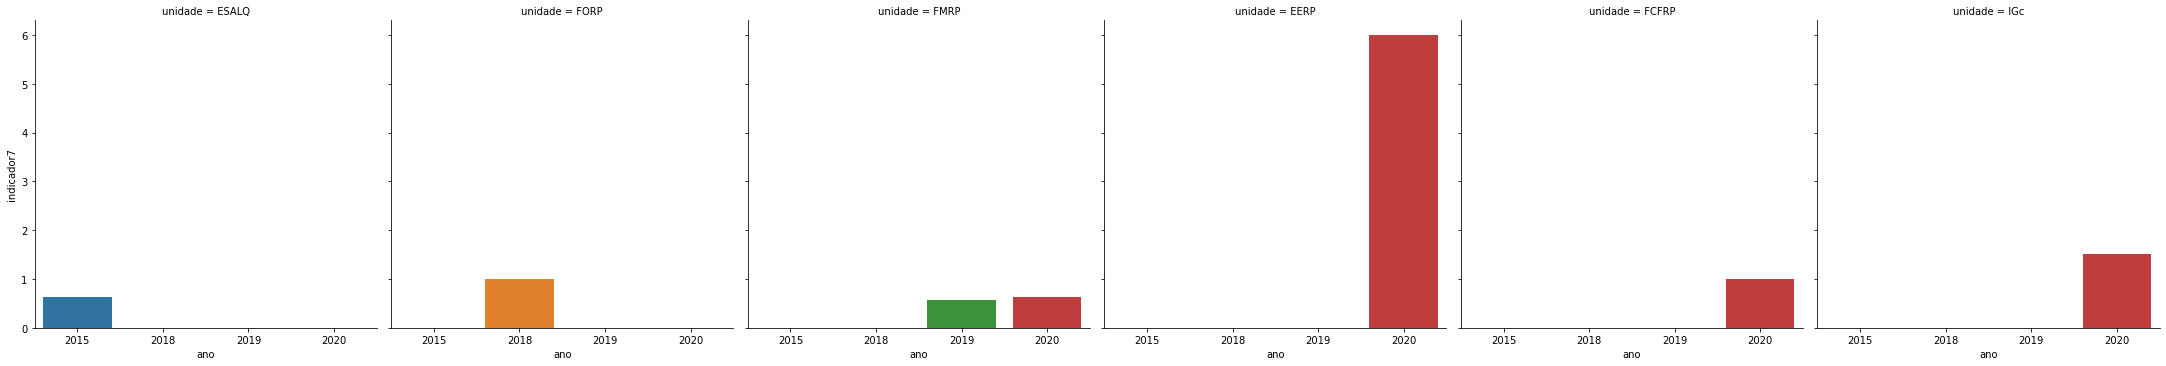

In [ ]:
sns.catplot(x="ano", y="indicador7", col="unidade",
                data=i1_7, 
                kind="bar"
                )

#**Indicador 8: journal / Nº de docentes**

In [ ]:
i1_8 = i1.loc[(i1['indicador8']) > 0.1] 
i1_8.sample(2)

,unidade,ano,Nfeedback,feedback,publication,teacher,editingteacher,forum,lesson,journal,poster,Nassess,Nadmin,checklist,advancedteacher,docentes,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
489,EERP,2020,110.0,6.0,17.0,54.0,536.0,466.0,6.0,1.0,0.0,1087.0,36.0,0.0,3.0,1.0,110.000000,6.0,17.0,54.0,536.000000,466.000000,6.0,1.0,0.0,1087.000000,36.0,0.000000,3.000000
507,FOB,2020,544.0,0.0,57.0,9.0,1286.0,605.0,0.0,12.0,0.0,848.0,30.0,5.0,22.0,3.0,181.333333,0.0,19.0,3.0,428.666667,201.666667,0.0,4.0,0.0,282.666667,10.0,1.666667,7.333333


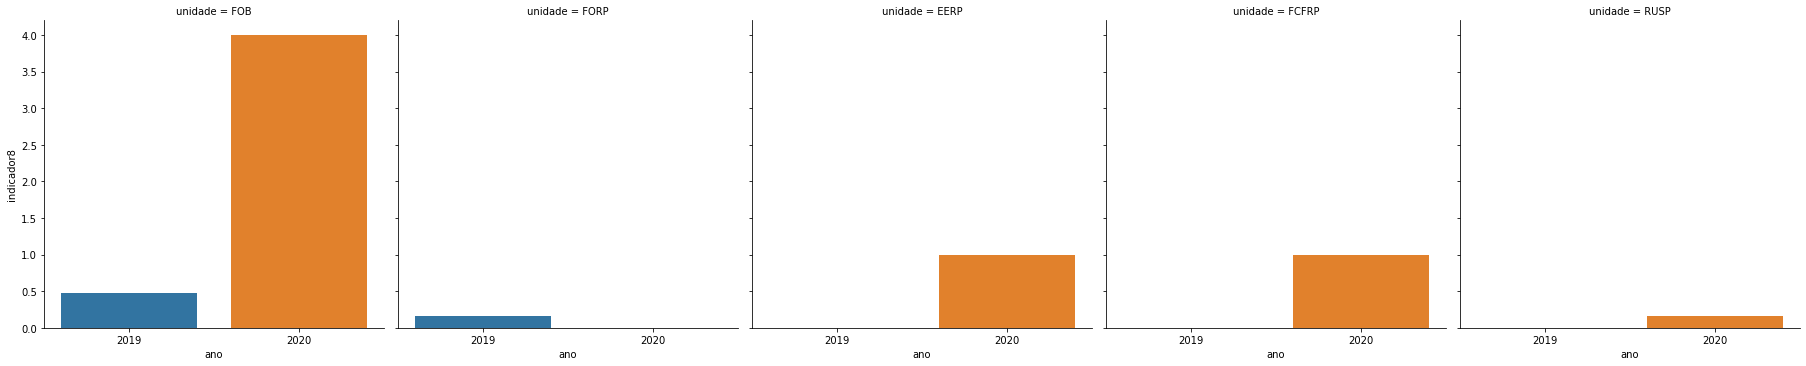

In [ ]:
sns.catplot(x="ano", y="indicador8", col="unidade",
                data=i1_8, 
                kind="bar"
                )

#**Indicador 9: poster / Nº de docentes**

In [ ]:
i1_9 = i1.loc[(i1['indicador9']) > 0.01] 
i1_9.sample(2)

,unidade,ano,Nfeedback,feedback,publication,teacher,editingteacher,forum,lesson,journal,poster,Nassess,Nadmin,checklist,advancedteacher,docentes,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
392,FOB,2018,90.0,4.0,0.0,5.0,168.0,42.0,4.0,0.0,1.0,105.0,0.0,0.0,0.0,60.0,1.500000,0.066667,0.0,0.083333,2.800000,0.700000,0.066667,0.000000,0.016667,1.750000,0.000000,0.000000,0.000000
462,IF,2019,50.0,1.0,0.0,0.0,237.0,211.0,1.0,3.0,2.0,849.0,9.0,1.0,5.0,110.0,0.454545,0.009091,0.0,0.000000,2.154545,1.918182,0.009091,0.027273,0.018182,7.718182,0.081818,0.009091,0.045455


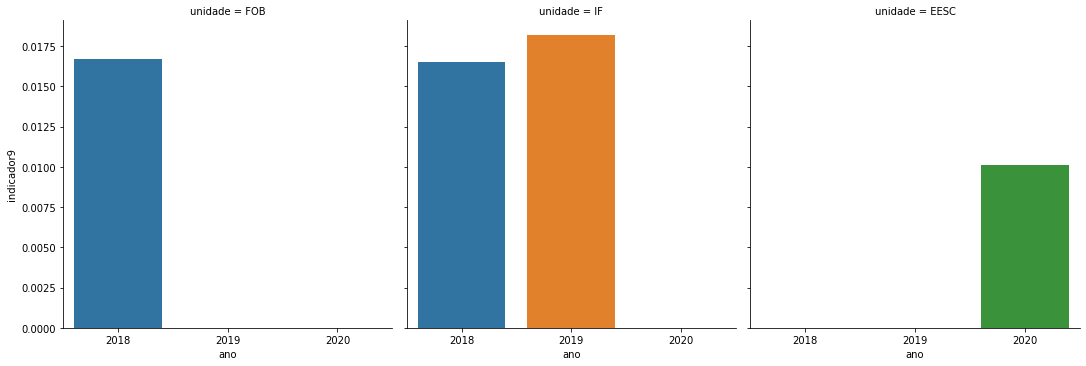

In [ ]:
sns.catplot(x="ano", y="indicador9", col="unidade",
                data=i1_9, 
                kind="bar"
                )

#**Indicador 10: Nassess / Nº de docentes**

In [ ]:
i1_10 = i1.loc[(i1['indicador10']) > 40] 
i1_10.sample(2)

,unidade,ano,Nfeedback,feedback,publication,teacher,editingteacher,forum,lesson,journal,poster,Nassess,Nadmin,checklist,advancedteacher,docentes,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
260,FEARP,2016,23.0,0.0,0.0,43.0,354.0,476.0,3.0,0.0,0.0,4726.0,50.0,0.0,2.0,94.0,0.244681,0.0,0.000000,0.457447,3.765957,5.063830,0.031915,0.0,0.0,50.276596,0.531915,0.0,0.021277
508,FORP,2020,25.0,0.0,2.0,8.0,450.0,346.0,2.0,0.0,0.0,530.0,26.0,0.0,11.0,6.0,4.166667,0.0,0.333333,1.333333,75.000000,57.666667,0.333333,0.0,0.0,88.333333,4.333333,0.0,1.833333


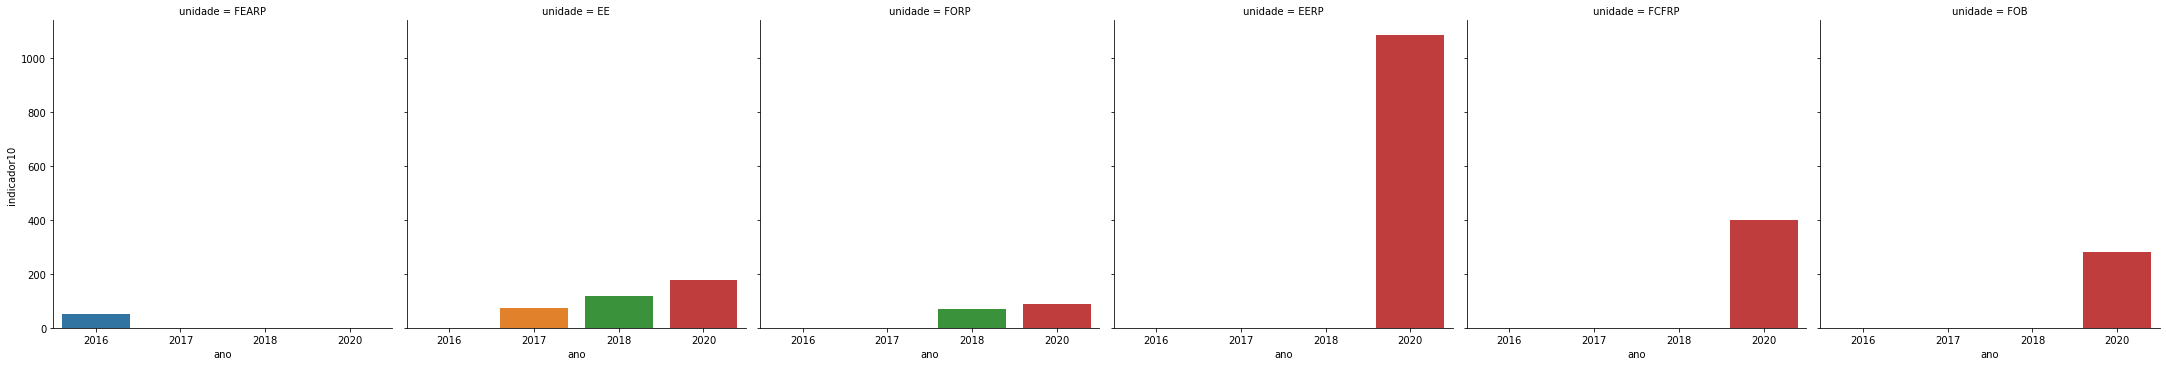

In [ ]:
sns.catplot(x="ano", y="indicador10", col="unidade",
                data=i1_10, 
                kind="bar"
                )

#**Indicador 11: Nadmin / Nº de docentes**

In [ ]:
i1_11 = i1.loc[(i1['indicador11']) > 2] 
i1_11.sample(2)

,unidade,ano,Nfeedback,feedback,publication,teacher,editingteacher,forum,lesson,journal,poster,Nassess,Nadmin,checklist,advancedteacher,docentes,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
507,FOB,2020,544.0,0.0,57.0,9.0,1286.0,605.0,0.0,12.0,0.0,848.0,30.0,5.0,22.0,3.0,181.333333,0.0,19.000000,3.000000,428.666667,201.666667,0.000000,4.0,0.0,282.666667,10.000000,1.666667,7.333333
508,FORP,2020,25.0,0.0,2.0,8.0,450.0,346.0,2.0,0.0,0.0,530.0,26.0,0.0,11.0,6.0,4.166667,0.0,0.333333,1.333333,75.000000,57.666667,0.333333,0.0,0.0,88.333333,4.333333,0.000000,1.833333


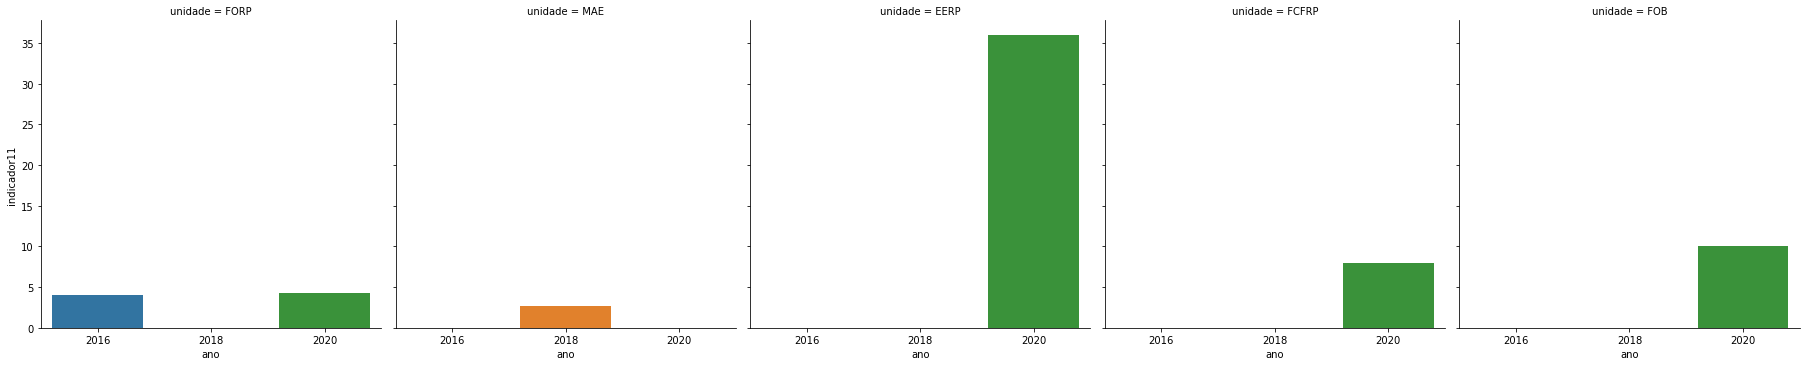

In [ ]:
sns.catplot(x="ano", y="indicador11", col="unidade",
                data=i1_11, 
                kind="bar"
                )

#**Indicador 12: checklist / Nº de docentes**

In [ ]:
i1_12 = i1.loc[(i1['indicador12']) > 0.01] 
i1_12.sample(2)

,unidade,ano,Nfeedback,feedback,publication,teacher,editingteacher,forum,lesson,journal,poster,Nassess,Nadmin,checklist,advancedteacher,docentes,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
521,IFSC,2020,61.0,0.0,28.0,5.0,273.0,327.0,5.0,0.0,0.0,884.0,79.0,2.0,3.0,79.0,0.772152,0.0,0.35443,0.063291,3.455696,4.139241,0.063291,0.0,0.0,11.189873,1.0,0.025316,0.037975
507,FOB,2020,544.0,0.0,57.0,9.0,1286.0,605.0,0.0,12.0,0.0,848.0,30.0,5.0,22.0,3.0,181.333333,0.0,19.00000,3.000000,428.666667,201.666667,0.000000,4.0,0.0,282.666667,10.0,1.666667,7.333333


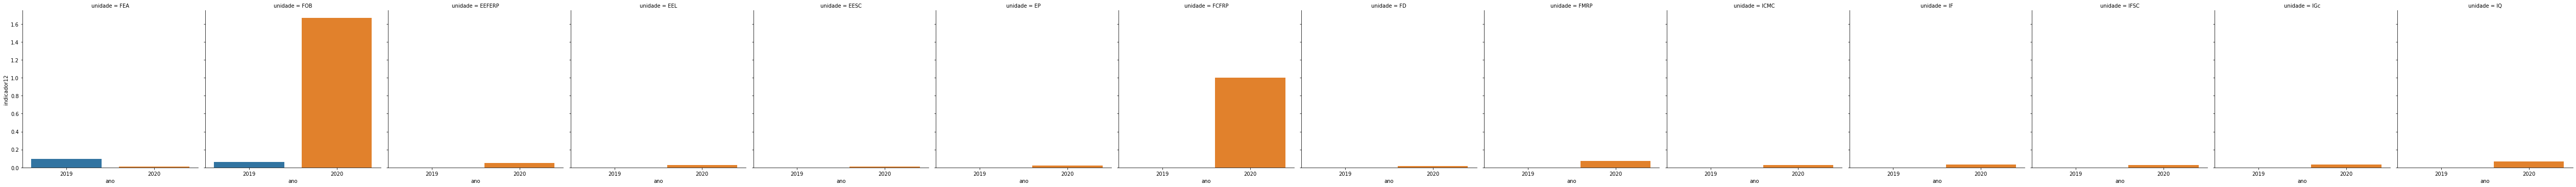

In [ ]:
sns.catplot(x="ano", y="indicador12", col="unidade",
                data=i1_12, 
                kind="bar"
                )

#**Indicador 13: advancedteacher / Nº de docentes**

In [ ]:
i1_13 = i1.loc[(i1['indicador13']) > 1] 
i1_13.sample(2)

,unidade,ano,Nfeedback,feedback,publication,teacher,editingteacher,forum,lesson,journal,poster,Nassess,Nadmin,checklist,advancedteacher,docentes,indicador1,indicador2,indicador3,indicador4,indicador5,indicador6,indicador7,indicador8,indicador9,indicador10,indicador11,indicador12,indicador13
446,FMRP,2019,515.0,2.0,4.0,87.0,1394.0,993.0,135.0,0.0,0.0,1833.0,31.0,0.0,938.0,237.0,2.172996,0.008439,0.016878,0.367089,5.881857,4.189873,0.569620,0.0,0.0,7.734177,0.130802,0.0,3.957806
264,FMRP,2016,571.0,0.0,0.0,50.0,827.0,699.0,35.0,0.0,0.0,743.0,11.0,0.0,490.0,267.0,2.138577,0.000000,0.000000,0.187266,3.097378,2.617978,0.131086,0.0,0.0,2.782772,0.041199,0.0,1.835206


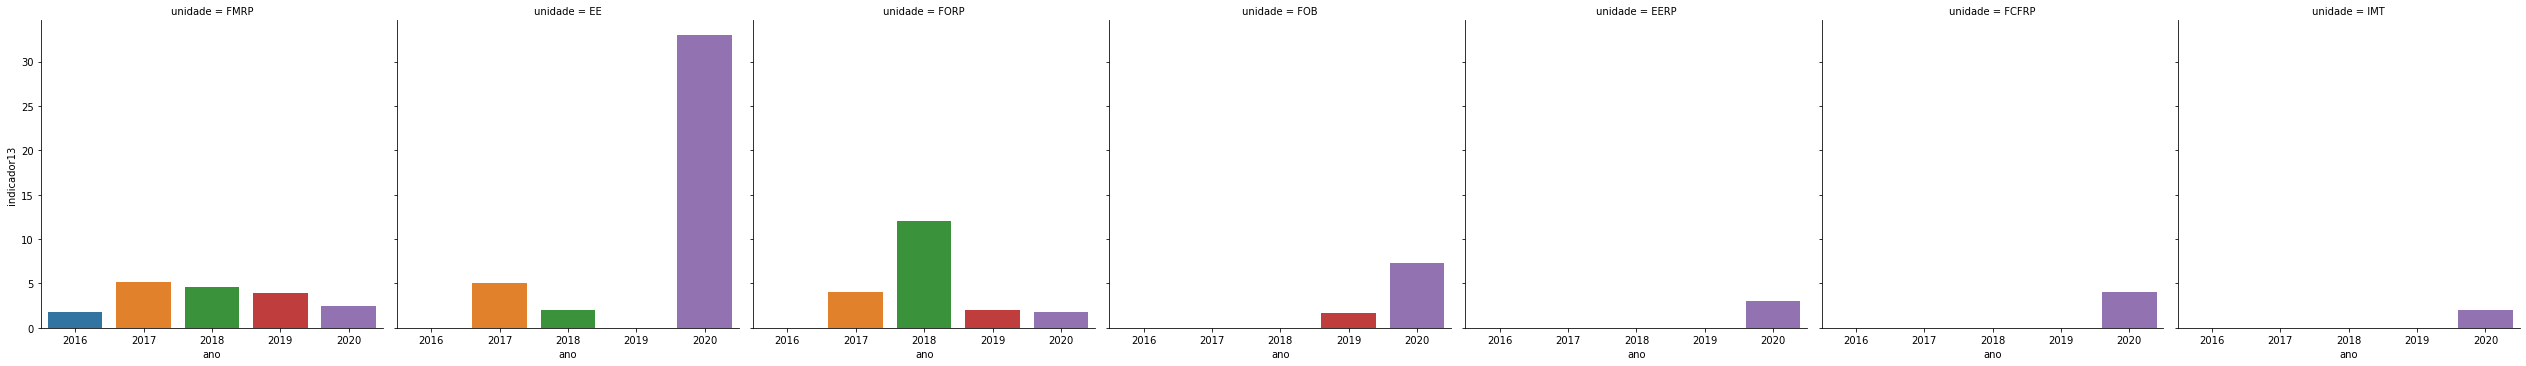

In [ ]:
sns.catplot(x="ano", y="indicador13", col="unidade",
                data=i1_13, 
                kind="bar"
                )